In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhilroxtomar/brain-tumor-segmentation")

print("Path to dataset files:", path)

100%|██████████| 312M/312M [00:09<00:00, 36.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nikhilroxtomar/brain-tumor-segmentation/versions/1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import tensorflow as tf
import os
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,concatenate,MaxPooling2D,Dropout
from tensorflow.keras.models import Model
import shutil
IMG_WIDTH=256
IMG_HEIGHT=256
IMG_CHANNELS=3

In [4]:
Original=os.listdir('/content/drive/MyDrive/BrainT/IMAGES')
Masks=os.listdir('/content/drive/MyDrive/BrainT/MASKS')
Original=Original
Masks=Masks
print(len(Original))
print(len(Masks))

X=np.zeros((len(Original),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS), dtype=np.float32)
y=np.zeros((len(Masks),IMG_HEIGHT,IMG_WIDTH,1), dtype=np.int32)

300
300


In [5]:
print(X.shape)
print(y.shape)

(300, 256, 256, 3)
(300, 256, 256, 1)


In [6]:
import matplotlib.pyplot as plt

In [7]:
import cv2
import numpy as np
for file in Original:
    n=Original.index(file)
    path1=os.path.join('/content/drive/MyDrive/BrainT/IMAGES',file)
    print(path1)
    img=cv2.imread(path1)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(256,256))
    try:
        X[n]=img/255
        file2=Masks[n]
        path2=os.path.join('/content/drive/MyDrive/BrainT/MASKS',file2)
        mask=cv2.imread(path2,cv2.IMREAD_GRAYSCALE)
        mask=cv2.resize(mask,(256,256))
        mask = tf.one_hot(mask, 1, dtype=tf.int32)
        y[n] = mask
    except Exception as e:
        print(e)
        print(path1)

/content/drive/MyDrive/BrainT/IMAGES/Copy of 10.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 1.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 6.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 8.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 9.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 5.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 3.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 7.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 2.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 4.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 11.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 12.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 13.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 15.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 22.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 21.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 17.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 19.png
/content/drive/MyDrive/BrainT/IMAGES/Copy of 18.png
/content/drive/MyDriv

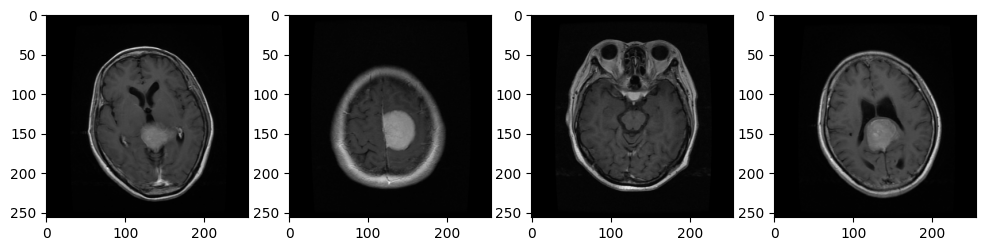

In [8]:
import matplotlib.pyplot as plt
i = np.random.randint(1, 100)
plt.figure(figsize = (12,15))
plt.subplot(141)
plt.imshow(X[i])

plt.subplot(142)
plt.imshow(X[i+1])

plt.subplot(143)
plt.imshow(X[i+2])

plt.subplot(144)
plt.imshow(X[i+3])

In [9]:
images = X
print(images.shape)

(300, 256, 256, 3)


In [10]:
masks = y
masks.shape

(300, 256, 256, 1)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(images,masks,test_size=0.2,random_state=42)

In [12]:
inputs=tf.keras.layers.Input((256,256,3))


s = inputs

c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.2)(c1)  # Original 0.1
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)


c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.2)(c2)  # Original 0.1
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)

c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)

c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)


c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = Dropout(0.3)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

#Expansive path

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.2)(c8)  # Original 0.1
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.2)(c9)  # Original 0.1
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)




outputs = Conv2D(1,(1, 1),activation='sigmoid')(c9)

model = Model(inputs=[inputs], outputs=[outputs])

In [13]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 16)   │            448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256, 256, 16)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 16)   │          2,320 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 16)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 32)   │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128, 128, 32)   │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 32)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64, 64, 64)     │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 64)     │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32, 32, 128)    │              0 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 128)    │        147,584 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 128)    │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)    

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer = tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'],)

In [15]:
import keras.backend as K
history=model.fit(X_train, y_train,validation_data = (X_test,y_test),epochs=10,)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.7962 - loss: 0.5790 - val_accuracy: 0.9817 - val_loss: 0.3658
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 276ms/step - accuracy: 0.9801 - loss: 0.2704 - val_accuracy: 0.9817 - val_loss: 0.1846
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.9818 - loss: 0.1161 - val_accuracy: 0.9817 - val_loss: 0.1052
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.9827 - loss: 0.0838 - val_accuracy: 0.9817 - val_loss: 0.1017
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.9812 - loss: 0.0840 - val_accuracy: 0.9817 - val_loss: 0.0925
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - accuracy: 0.9822 - loss: 0.0739 - val_accuracy: 0.9817 - val_loss: 0.0810
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.9809 - loss: 0.0857 - val_accuracy: 0.9817 - val_loss: 0.0908
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - accuracy: 0.9816 - loss: 0.0744 - val_accuracy: 0.9817 - val_loss: 

<ipython-input-16-8caf48e65429>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', color='green',label='Validation acc')


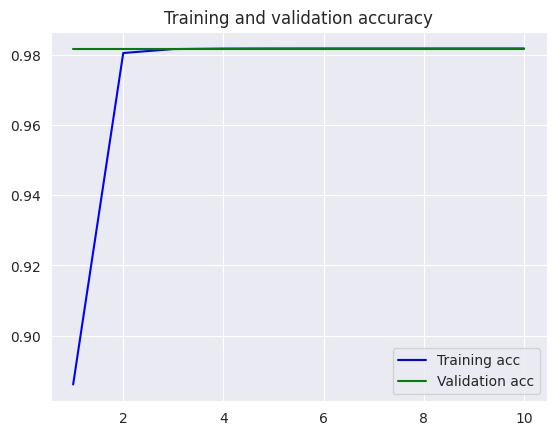

In [16]:
import seaborn as sns
sns.set_style('darkgrid')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'b', color='green',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

<ipython-input-17-07a6694458de>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', color = 'green', label='Validation loss')


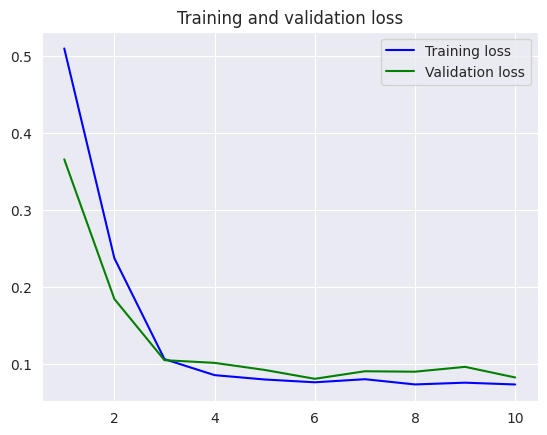

In [17]:
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', color = 'green', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
def predict_image(img_path, mask_path, model):
    H = 256
    W = 256
    num_classes = 1

    img = cv2.imread(img_path)
    img = img[:256, :256, :]
    img = img / 255.0
    img = img.astype(np.float32)


    ## Prediction
    pred_mask = model.predict(np.expand_dims(img, axis=0))
    #pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[0]


    # calculating IOU score
    inter = np.logical_and(mask, pred_mask)
    union = np.logical_or(mask, pred_mask)

    iou = inter.sum() / union.sum()

    return img, mask, pred_mask, iou


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


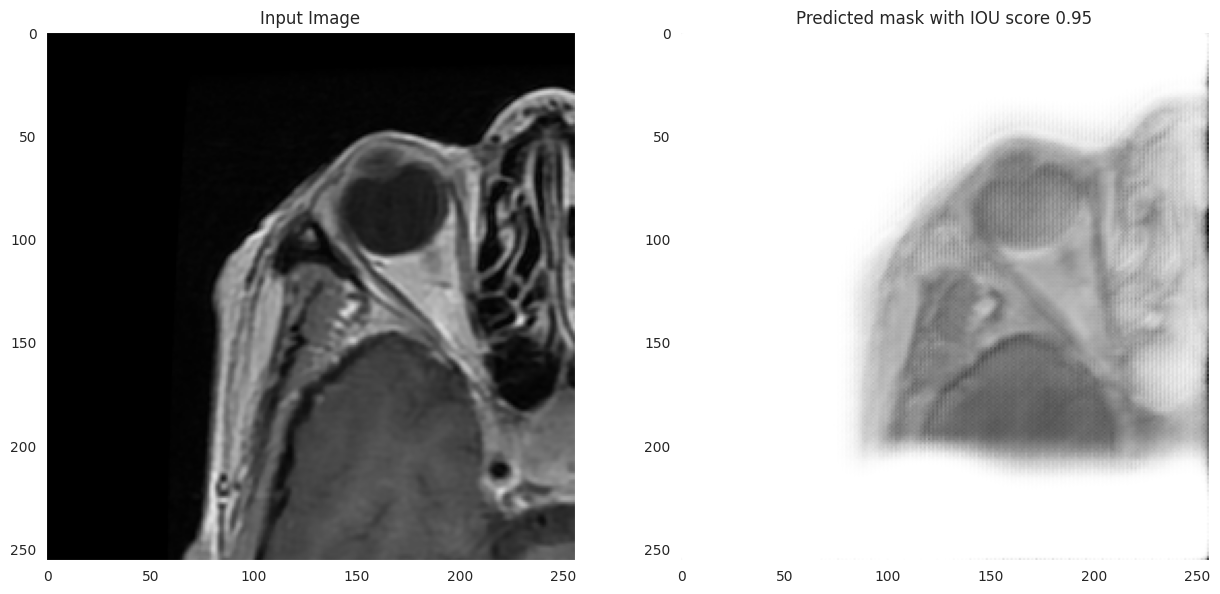

In [34]:
sns.set_style('dark')
img_path = '/content/drive/MyDrive/BrainT/images/1310.png'
mask_path = '/content/drive/MyDrive/BrainT/masks/1310.png'

img, mask, pred_mask, iou = predict_image(img_path, mask_path, model)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 10))

ax1.set_title("Input Image")
ax1.imshow(img)

ax2.set_title("Predicted mask with IOU score %.2f"%(iou))
ax2.imshow(pred_mask, cmap='gray')
plt.show()

In [23]:
print(iou)

0.954345703125
